<a href="https://colab.research.google.com/github/xfil/IHMT-PythonCourse-2023/blob/main/Project_Galba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identificar a distribuição geográfica de Galba truncatula na Europa.**

<div>
<img src="https://azoresbioportal.uac.pt/imagensEspecies/9/5/4/0/galba-truncatula-t00178-38.jpg" width="500"/>
</div>
Source: https://azoresbioportal.uac.pt/pt/especies-dos-acores/galba-truncatula-9540/

1 - Install pygbif

In [ ]:
!pip install pygbif


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.4 MB/s eta 0:00:00


2 - Mount the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3 - Import libraries


In [ ]:
from pygbif import species as species
from pygbif import occurrences as occ
import pygbif
pygbif.caching(True)
import pandas as pd

4 - Choose species of interest for the project.

In [ ]:
Galba_truncatula = occ.search(continent='europe', taxonKey=2291336, hasCoordinate=True, limit=20000)

In [ ]:
Galba_truncatula

4 - Define the dataframe and select the first three lines.

In [ ]:
Galba_truncatuladf = pd.DataFrame.from_dict(Galba_truncatula['results'])

Galba_truncatuladf.head(3)

,key,datasetKey,publishingOrgKey,installationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,hostingOrganizationKey,...,preparations,nomenclaturalCode,georeferencedBy,verbatimCoordinateSystem,disposition,collectionID,organismRemarks,behavior,depth,depthAccuracy
0,4034640597,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,PT,DWC_ARCHIVE,2023-05-09T19:30:03.016+00:00,2023-05-10T00:41:23.905+00:00,364,28eb1a3f-1c15-4a95-931a-4af90ecb574d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4058200473,8a863029-f435-446a-821e-275f4f641165,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,85ccfd1a-a837-48d6-9a87-96c99f6fe012,NL,DWC_ARCHIVE,2023-03-15T10:51:15.320+00:00,2023-04-18T13:15:05.935+00:00,89,396d5f30-dea9-11db-8ab4-b8a03c50a862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4058203503,8a863029-f435-446a-821e-275f4f641165,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,85ccfd1a-a837-48d6-9a87-96c99f6fe012,NL,DWC_ARCHIVE,2023-03-15T10:51:15.320+00:00,2023-04-18T13:15:07.553+00:00,89,396d5f30-dea9-11db-8ab4-b8a03c50a862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5 - List columns

In [ ]:
listCols = ['acceptedScientificName', 'acceptedTaxonKey', 'basisOfRecord', 'continent', 'country', 'day', 'decimalLatitude', 'decimalLongitude', 'eventDate', 'eventTime', 'family', 'gadm', 'genus', 'genusKey', 'geodeticDatum', 'species', 'year', 'month']


6 - Remove columns that we don't care.

In [ ]:
Galba_truncatuladf = Galba_truncatuladf[sorted(listCols)]
Galba_truncatuladf.head(3)

,acceptedScientificName,acceptedTaxonKey,basisOfRecord,continent,country,day,decimalLatitude,decimalLongitude,eventDate,eventTime,family,gadm,genus,genusKey,geodeticDatum,month,species,year
0,"Galba truncatula (O.F.Müller, 1774)",2291336,HUMAN_OBSERVATION,EUROPE,Portugal,12,39.102537,-9.381363,2023-02-12T10:14:13,10:14:13+00:00,Lymnaeidae,"{'level0': {'gid': 'PRT', 'name': 'Portugal'},...",Galba,2291335,WGS84,2,Galba truncatula,2023
1,"Galba truncatula (O.F.Müller, 1774)",2291336,HUMAN_OBSERVATION,EUROPE,Germany,14,51.061719,9.990563,2023-02-14T00:00:00,18:49,Lymnaeidae,"{'level0': {'gid': 'DEU', 'name': 'Germany'}, ...",Galba,2291335,WGS84,2,Galba truncatula,2023
2,"Galba truncatula (O.F.Müller, 1774)",2291336,HUMAN_OBSERVATION,EUROPE,Germany,14,51.061719,9.990563,2023-02-14T00:00:00,18:53,Lymnaeidae,"{'level0': {'gid': 'DEU', 'name': 'Germany'}, ...",Galba,2291335,WGS84,2,Galba truncatula,2023


7 - Obtain the number of registries.

In [ ]:
Galba_truncatuladf['species'].value_counts()


Galba truncatula    300
Name: species, dtype: int64

8 - Obtain null data in this dataset.

In [ ]:
Galba_truncatuladf.isnull().sum()

acceptedScientificName      0
acceptedTaxonKey            0
basisOfRecord               0
continent                   0
country                     0
day                         0
decimalLatitude             0
decimalLongitude            0
eventDate                   0
eventTime                 198
family                      0
gadm                        0
genus                       0
genusKey                    0
geodeticDatum               0
month                       0
species                     0
year                        0
dtype: int64

9 - install *folium*

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


10 - Import folium libraries and plugins.

In [ ]:
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
# Definir a chave da espécie de interesse
splist = ['Galba truncatula']
keys = [species.name_backbone(x)['usageKey'] for x in splist]
keys

[2291336]

In [ ]:
#Criar o mapa
f = folium.Figure(width=1000, height=500)
m_2 = folium.Map(location=[38.7, -9], tiles='openstreetmap', zoom_start=5).add_to(f)

# adicionar ocorrências
for idx, row in Galba_truncatuladf.iterrows():
  Marker([row['decimalLatitude'], row['decimalLongitude']],popup=Galba_truncatuladf.iloc[idx]['species']).add_to(m_2)

#mostrar o mapa
m_2

In [ ]:
# criar outro tipo de mapa
f = folium.Figure(width=1000, height=500)
m_3 = folium.Map(location=[38.7, -9], tiles='cartodbpositron', zoom_start=5).add_to(f)

# adicionar ocorrências
mc = MarkerCluster()
for idx, row in Galba_truncatuladf.iterrows():
    if not math.isnan(row['decimalLongitude']) and not math.isnan(row['decimalLatitude']):
        mc.add_child(Marker([row['decimalLatitude'], row['decimalLongitude']]))
m_3.add_child(mc)

# mostrar o mapa
m_3

18. Import seaborn libraries.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# call my variable"
df = Galba_truncatuladf

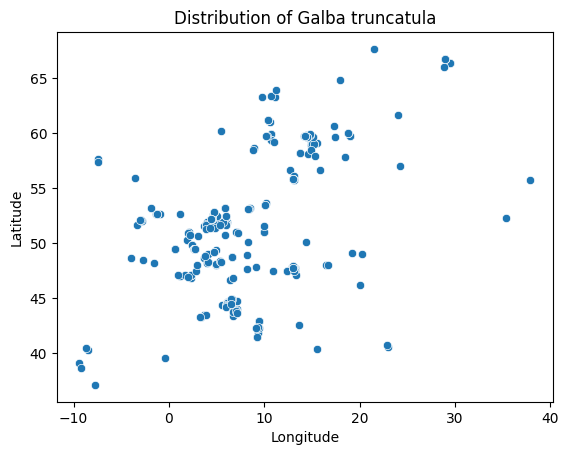

In [ ]:
# make a Scatter plot
sns.scatterplot(x='decimalLongitude', y='decimalLatitude', data=df)
plt.title('Distribution of Galba truncatula')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

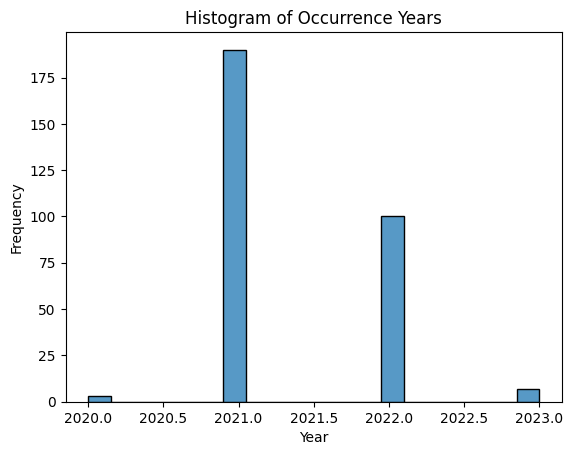

In [ ]:
# make an Histogram
sns.histplot(df['year'], bins=20)
plt.title('Histogram of Occurrence Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

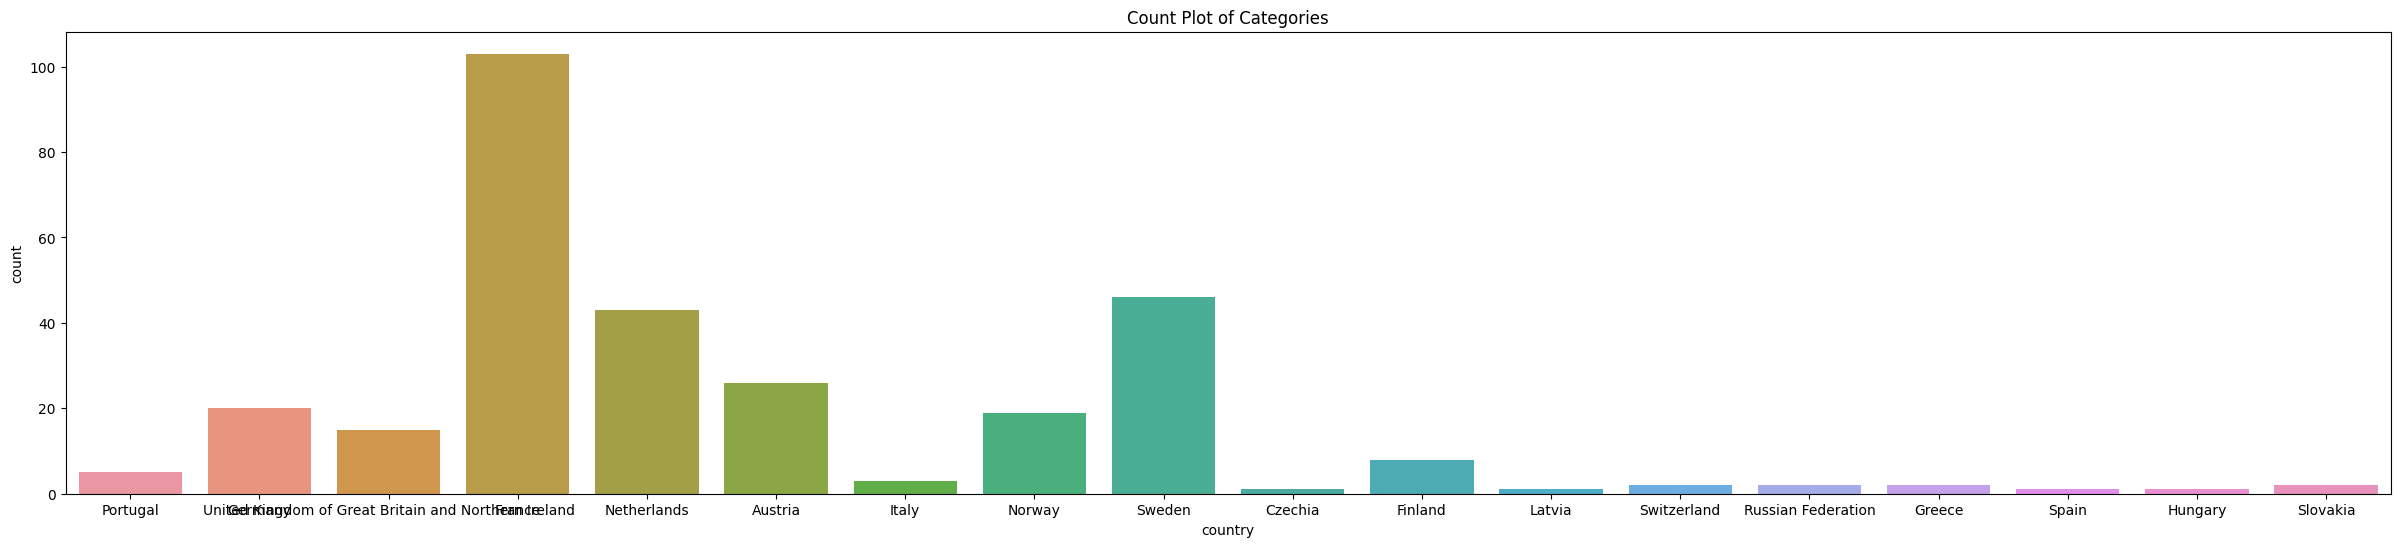

In [ ]:
# Create a count plot
plt.figure(figsize=(30, 6))
sns.countplot(x='country', data=df)

# Add title and display the plot
plt.title('Count Plot of Categories')
plt.show()

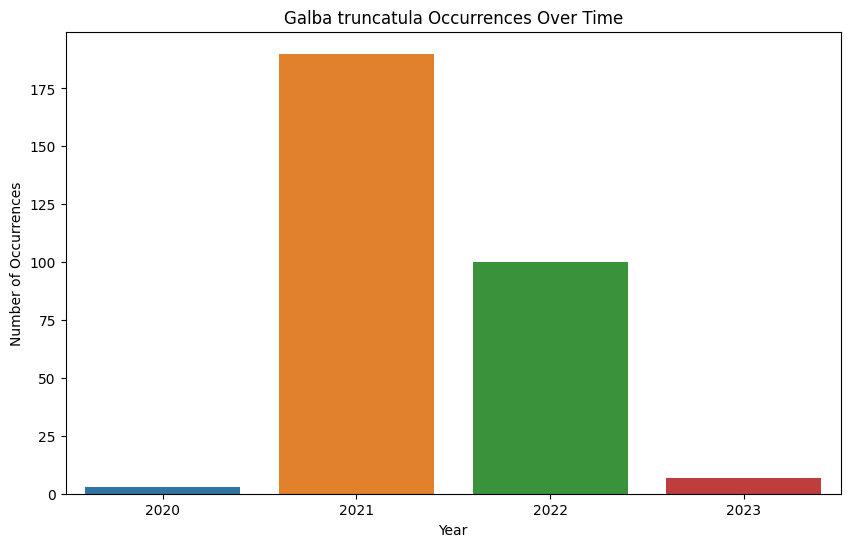

In [ ]:
# Count the number of occurrences per year
occurrences_per_year = df['year'].value_counts().sort_index()

# Set the desired figure size
plt.figure(figsize=(10, 6))

sns.barplot(x=occurrences_per_year.index, y=occurrences_per_year.values)

# Add labels and title
plt.title('Galba truncatula Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')

# Display the plot
plt.show()

<ipython-input-22-1ab251f9f339>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['decimalLongitude'], y=df['decimalLatitude'], cmap='Reds', shade=True)


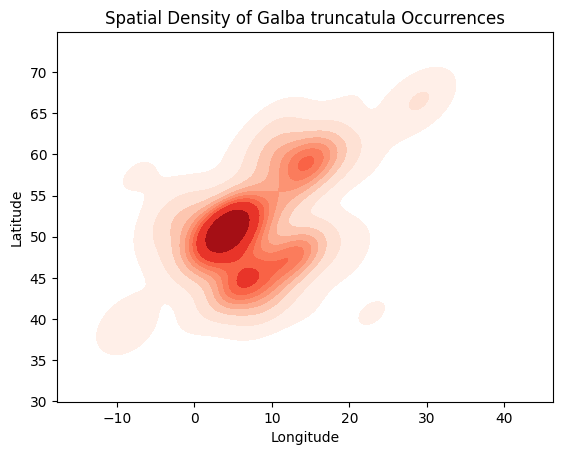

In [ ]:
# Create a kernel density estimation plot (KDE) or heat map
sns.kdeplot(x=df['decimalLongitude'], y=df['decimalLatitude'], cmap='Reds', shade=True)

# Add labels and title
plt.title('Spatial Density of Galba truncatula Occurrences')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()